<div class="alert alert-warning">
To-dos:<br>
- add ds lifecycle<br>
- remove plots/sections on plotting designed+staffed capacity separately (prisons section)<br>
- update table of contents<br>
- aggregate context/intros at the beginning?<br>
- clean up data folder, keep only those used in this notebook<br>
- re-do question numbering<br>
- make plot titles more specific<br>
    
</div>

# State Prisons and County Jails

***

The goal of this project is for students to understand that they can do social work using data. This notebook explores the incarceration trends and impacts of prison realignment in California.


---

### Table of Contents
[THE DATA](#sectiondata)<br>

[CONTEXT](#sectioncontext)<br>


[PRISONS](#section1)<br>
1. [DATA](#subsection1)<br> 
2. [DATA ANALYSIS](#subsection2)<br>
3. [GENERAL: DESIGNED & STAFFED CAPACITY](#subsection3)<br>
4. [GENDER DIVISION](#subsection4)<br>


[JAILS](#jailssection)<br>

[THE DATA, part 2](#sectionjdata)<br>

[CONTEXT](#sectionjcontext)<br>

1. [DATA](#jailsection1)<br>
2. [DATA ANALYSIS](#jailsection2)<br>
3. [GENERAL:SENTENCED & UNSENTENCED](#jailsection3)<br>
4. [GENDER DIVISION](#jailsection4)<br>

In [2]:
# This loads tools from the datascience library
from datascience import * 
# Loads numerical methods
import numpy as np 

# This loads some visualization tools
import matplotlib  
%matplotlib inline
import matplotlib.pyplot as plt
# This selects a certain 'style' for our graphs
plt.style.use('fivethirtyeight') 


# Loads a widgets library that will allow for interactive learning
import ipywidgets as widgets 

## <font color =#d14d0f>Context</font>  <a id='sectioncontext'></a>
---

Throughout the course, we have learned about the policies of realignment, incarceration, and crime trends in California. By exploring this dataset we hope to get a clearer picture of the magnitude of prison and county jail overcrowding per facility and region, and the effects of realignment policies in state prisons and county jails.

The key difference between state prisons and jails involve the process of sentencing. Prisons are designed for long term sentences, while jails are for those who are unsentenced or have short term sentences. It is important to note that short-term sentences are generally one year or less. Another difference is that prisons are larger and controlled at the state level. In contrast, jails are smaller and handled by a city or county.

The relationship between the two institutions is emphasized by mass incarceration. Through this activity, we will analyze how overcrowding within California’s state prisons influenced the size of jail populations after realignment policies were implemented.

## <font color =#d14d0f>The Data</font> <a id='sectiondata'></a>
---
We will first use data from the CDCR (California Department of Corrections and Rehabilitation).

In this dataset, the CDCR reports the number of people in state prisons across California from 1996 to 2018. You will find information about the capacity (staff & design) of each prison and the current population. This will provide with a framework with which to understand prison overcrowding and the effectiveness of policy to reduce it. 

If you are interested in learning more please visit: [CDCR data and information](https://github.com/nrjones8/cdcr-population-data)

### **Data** <a id='subsection1'> </a>

#### Data Dictionary
Below is a data dictionary for future reference. This data dictionary goes over what the column names mean in the data loaded.

|Column Name   | Description |
|--------------|---------|
|year |Year that the data was collected  |
|month | Month that the data was collected |
|institution_name |  Abbreviated Name of the State Prison|
|population_felons | People imprisoned for committing felony (serious or violent crime) |
|civil_addict | People imprisoned for drug related offenses |
|total_population | Sum of civil addict and population felons columns|
|designed_capacity | Max number of people the prison was built to hold|
|percent_occupied | Percentage of people incarcerated out of designed capacity|
|staffed_capacity | Max number of people the prison can hold based on the number of people employed|

Let's take a look at the data. We'll sort it by year with the oldest years at the top.

In [3]:
prisons = Table().read_table("./data/monthly_cdcr.csv")
prisons.sort('year').show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
0,1996,1,VSP (VALLEY SP),2294,0,2294,1980,115.9,1980
1,1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
2,1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
3,1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
4,1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842


### **Data Analysis** <a id='subsection2'> </a>

When processing a new data set, it is a good idea to play around with the data and try to combine it in different ways. To start it's good to think about how many times we expect each prison to occur in our dataset, and how many times each *actually* appears.

Our dataset is made up of prisons in California from the year 1996 to 2018. The counts in our data set were done monthly, meaning for each year we expect there to be at most 12 counts for each prison. Let's calculate the number of times we expect each prison to appear in a cell below.

In [4]:
months = 12
years = 2018 - 1996 + 1 # We add one to our calculation because we want to include 1996

months * years

276

By running the cell above you should see that we expect for there to be a maximum of 276 instances of each prison for the time period we have in our data set. This amount is equivalent to an entry once a month for 23 years.

To find the number of times that each institution appears in our data set, we would have to group by the institution name. Essentially, we want our computer to make groups that only have values from the same prison. After we have made these groups, we can decide how to handle the data per group.

The code that corresponds to this is the table function `group()`. The `group()` function takes in a column name and puts all the similar values in that column into groups, then it counts the number of items in each group.

Then, we can use the `sort()` function to order the counts in a specific order.

In [5]:
# We choose to have the counts in descending order in the following example:
prisons.group("institution_name").sort("count", descending = True).show()

institution_name,count
SCC (SIERRA CONSERVATION CENTER),392
"LAC (CA SP, LOS ANGELES COUNTY)",283
VSP (VALLEY SP),279
ASP (AVENAL SP),276
CAL (CALIPATRIA SP),276
CCC (CA CORRECTIONAL CENTER),276
CCI (CA CORRECTIONAL INSTITUTION),276
CCWF (CENTRAL CA WOMEN'S FAC),276
CEN (CENTINELA SP),276
CIM (CA INSTITUTION FOR MEN),276


<font color = #d14d0f>**QUESTION 2**:</font> What do we notice from this table? You should notice that there are values in our table that do not correlate with what we calculated above. Remember that we expect each prison to appear at most 276 times.

*Replace this text with your response!*

The cases where we have counts greater than 276 should interest you. If we assume that some of these counts are due to multiple entries per month, why would a prison need to do this? What is the significance of these counts, meaning what makes one count in a month different from the other count in that same month?

To understand why we have different counts, we will look into these special prisons. For the rest of this section, we'll examine the following prisons:
- Valley State Prison (VSP)
- Sierra Conservation Center (SCC)
- Los Angeles County State Prison (LAC)

We will explain what we think is the cause of "inconsistency" in the data, and how we decided to handle it. Then, we will read a data table with the "cleaned" data using `Table().read_table()` and assign it to a new variable.

Though we denoted them as "inconsistencies", we urge you not to look at this as mistakes in the data but try to think how they fit into the major issues we have learned about in the class.

#### Valley State Prison

From outside research, we discovered that Valley State Prison changed from a female prison to a male prison in 2012 -- October of 2012 to be exact. However, all rows are labeled as a male institution. For future analysis, it would be better to separate VSP into its corresponding female and male years. Thus, we decided to split and relabeled the VSP data into male and female parts. The code for this process is not shown but we have cleaned the data and are reading it as a new table below!

In [6]:
prisons_1 = Table().read_table("data/prisons1.csv")
prisons_1.where('institution_name', are.containing("VALLEY SP (")).show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
0,1996,1,VALLEY SP (FEMALE),2294,0,2294,1980,115.9,1980
34,1996,2,VALLEY SP (FEMALE),2096,0,2096,1980,105.9,2184
68,1996,3,VALLEY SP (FEMALE),2326,7,2333,2380,98,2584
102,1996,4,VALLEY SP (FEMALE),2498,13,2511,2380,105.5,2584
136,1996,5,VALLEY SP (FEMALE),2562,9,2571,2380,108,2584


#### Sierra Conservation Center (SCC)

For the Sierra Conservation Center, there were many double counts for each month. When we researched why there were separate counts for the same prison, it was unclear. One count had values in the thousands, while the other count was in the hundreds. Our best guess is that the prison counted the number of people within a fire camp nearby. We split and relabeled our data to show the difference between the smaller and larger population. Once again the code for this process is not shown but we read it in as a new table.

In [7]:
prisons_2 = Table().read_table("data/prisons2.csv")
prisons_2.where('institution_name', are.containing("SIERRA")).show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
7,1996,1,SIERRA CONSERVATION CENTER (PRISON),6010,0,6010,3606,166.7,5884
41,1996,2,SIERRA CONSERVATION CENTER (PRISON),5912,0,5912,3606,163.9,5884
75,1996,3,SIERRA CONSERVATION CENTER (PRISON),5912,0,5912,3606,163.9,5884
109,1996,4,SIERRA CONSERVATION CENTER (PRISON),5979,0,5979,3606,165.8,5884
143,1996,5,SIERRA CONSERVATION CENTER (PRISON),5884,0,5884,3606,163.2,5884


#### Los Angeles County State Prison (LAC)

In the case of Los Angeles County prison, we saw that from December 2005 to June 2006 there was a double count recorded for the prison population. Although we are unsure what caused the differences between the two groups, we noted that one group had a population size ranging in the four thousands while the other group was in the range of less than one thousand. We split and relabeled the data to show the difference between the smaller and larger population.

<font color = #d14d0f>**QUESTION 3**:</font> Why might we want to use the difference between the two populations instead of just replacing the population with either count?

*Replace this text with your response!*

In [8]:
prisons_3 = Table().read_table("data/prisons3.csv")
prisons_3.where('institution_name', are.containing("LOS")).show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
23,1996,1,LOS ANGELES COUNTY (STATE PRISON),3978,0,3978,2200,180.8,4000
57,1996,2,LOS ANGELES COUNTY (STATE PRISON),3919,0,3919,2200,178.1,4000
91,1996,3,LOS ANGELES COUNTY (STATE PRISON),3975,0,3975,2200,180.7,4000
125,1996,4,LOS ANGELES COUNTY (STATE PRISON),4064,0,4064,2200,184.7,4000
160,1996,5,LOS ANGELES COUNTY (STATE PRISON),4012,0,4012,2200,182.4,4000


### **General: Designed & Staffed Capacity** <a id='subsection3'> </a>

#### Designed Capacity of California's Prisons Over Time

**Context**: The Prison Industrial Complex has created our current issue with mass incarceration. Throughout the course, you have learned how prisons are designed to hold large numbers of people, and how creating these large institutions perpetuates the cycle of mass incarceration because these prisons are made with the intent to be filled.

In this next section, we will break down how the designed capacity of prisons is related to the actual population within a given institution. We will later compare the total population with the number of people employed to sustain this system.

**Data Cleaning:** We will be looking at the trends in prison population over time. For this purpose it is not necessary to view all the columns of our table so we will use another table function, `select()` to cut out the unnecessary columns. We will be keeping `year`, `institution_name`, and `designed_capacity`. The resulting table is assigned to `year_and_design_capacity` so we can use it again in the future.

Ultimately, we want to see what the `designed_capacity` is for ALL the prisons in a given year. Remember that nifty `group()` function? We achieve our goal by grouping by year using the function `group()` and summing over all the prisons in that year. Since we are only interested in looking at designed capacity for all prisons, we can create a new table that only includes the `designed_capacity` and `year` columns. We do this by selecting the necessary columns just as we did above!

Before we continue, please note that for the remainder of this notebook, we will use an updated version of the `prisons` table that includes the changes we made above. We call this updated table `prisons_updated`.

In [9]:
# Include the changes listed above
prisons_updated = prisons_3

# Select only the necessary columns and show the top 3
year_and_design_capacity = prisons_updated.select("year", "institution_name",'designed_capacity')
year_and_design_capacity.show(3)

design_capacity_ca = year_and_design_capacity.select("designed_capacity", "year").group("year", sum)
design_capacity_ca.show(3)

year,institution_name,designed_capacity
1996,NCWF (NO CAL WOMEN'S FACIL),400
1996,CCWF (CENTRAL CA WOMEN'S FAC),2004
1996,"CRC (CAL REHAB CTR, WOMEN)",500


year,designed_capacity sum
1996,873676
1997,910797
1998,956740


**Plotting**: Although it is possible to compare the values for designed capacity year by year and try to notice a pattern, often times it is more useful to visually inspect the information as it might reveal useful insights and provide a context for the data we are looking at. We'll create a line plot to reflect the changes in design capacity of California's state prisons over time.

In order to plot a trend of our data we will use a `plot()` function that takes in two inputs: `plot(x, y)`, where the `x` and `y` represent two column names that you would like to plot along the x and y axis respectively. We then append this to our table's name using dot notation. This tells the computer in which table to look for those columns.

We will focus on some years that mark important shifts as a result of realignment. Below, we look at the year 2011. To do this we will employ a new table function to select data only **where** the year is equal to 2011. This function is appropriately named the `where()` function and takes in two inputs: a column name and a year (in that order).

To emphasize this year and visualize it more easily on our trend line, we will run some code that will create a dot where the year equals 2011. Don't worry about the code used, but feel free to read through it if you're interested in seeing how we created this marker.

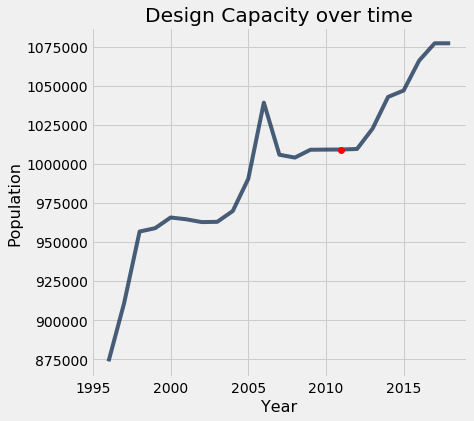

In [11]:
design_capacity_2011 = design_capacity_ca.where("year", 2011)

# Assign the year 2011 as the x-coordinate
x_coordinate_2011 = design_capacity_2011.column('year')

# Assign the designed capacity sum in the year 2011 as the y-coordinate
y_coordinate_2011 = design_capacity_2011.column("designed_capacity sum")

design_capacity_ca.plot("year", "designed_capacity sum"); # Plot our trend

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Design Capacity over time")

plt.plot(x_coordinate_2011, y_coordinate_2011, 'ro'); # Plot a single x,y coordinate

<font color = #d14d0f>**QUESTION 4**:</font> In looking at the graph produced, how does it reflect the systematic changes in California's potential prison population? In particular, name a court case that is related to the red marker in our graph.

*Replace this text with your response!*

<font color = #d14d0f>**QUESTION 5**:</font> Let's analyze our graph further; what do you think happened in 2006 that caused the spike we see?

*Replace this text with your response!*

#### Total Population in California's Prisons Over Time

**Context**: In the last section, we observed the change in the number of people California's prisons are designed to hold. Given this change over time, we wanted to compare it with the actual number of people within California's prisons and see how the two quantities correlated. To do this, we will calculate the percent for how full prisons were based on *how many people each prison is designed to hold*.

**Data Cleaning**: Once again, since we are interested in calculating prison population percentage based on design capacity, we need only a few columns from our `prisons_updated` table. We will select only `year`, `total_population`, and `designed_capacity`. We will call this new table `total_pop_and_design`. We will also group by year and sum both `total_population` and `designed_capacity` for all prisons given a year.

In [12]:
total_pop_and_design = prisons_updated.select("year", "total_population", "designed_capacity")
total_pop_and_design.show(5)
sum_total_and_design = total_pop_and_design.group("year", sum)
sum_total_and_design.show(5)

year,total_population,designed_capacity
1996,790,400
1996,2859,2004
1996,794,500
1996,1726,1026
1996,4537,2484


year,total_population sum,designed_capacity sum
1996,1623806,873676
1997,1739423,910797
1998,1788142,956740
1999,1818019,958881
2000,1820519,965721


Now that we have our information grouped by year and summed over all the prisons, we can begin calculating our percentage. To get this percentage we must first assign all of our `total_population` values to a variable and do the same for `designed_capacity`. Then we will divide the `total_population` values by their corresponding `designed_capacity` and multiply by 100 to get the population percentage, then adding this as a column to the table.

In [13]:
total_population = sum_total_and_design.column("total_population sum") 
designed_sum = sum_total_and_design.column("designed_capacity sum")

capacity_percentage = (total_population / designed_sum) * 100
print(capacity_percentage)

# Use .with_column() to add a new column with the percentages calculated above!
total_and_design_and_percentages_table = sum_total_and_design.with_column("Design Percent", capacity_percentage)

total_and_design_and_percentages_table.show(3)

[185.85905988 190.97812136 186.89947112 189.59797931 188.51397039
 186.46297264 186.17592316 188.84950734 192.63564133 190.09189001
 188.49532912 195.52605312 190.30095205 183.36618572 178.73669545
 173.23535445 149.88321645 144.95077023 138.83530151 132.72696534
 131.7232109  132.02795138 131.94811151]


year,total_population sum,designed_capacity sum,Design Percent
1996,1623806,873676,185.859
1997,1739423,910797,190.978
1998,1788142,956740,186.899


<font color = #d14d0f>**QUESTION 6**:</font> What can you immediately comment on by looking at the top three percentage values in our new column?

*Replace this text with your response!*

Now that we have our table set up correctly, we can plot how overcrowding has changed over time.

**Plotting**: Using the same methods as before, we will draw a line plot to reflect the trend in overcrowding in California state prisons over time.

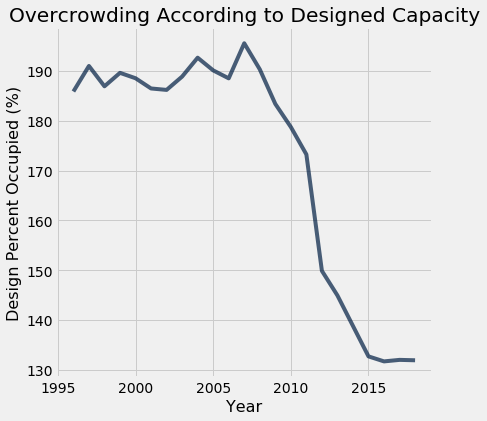

In [14]:
total_and_design_and_percentages_table.plot("year", "Design Percent")

plt.xlabel("Year")
plt.ylabel("Design Percent Occupied (%)")
plt.title("Overcrowding According to Designed Capacity");

#### Staffed Capacity

We have now seen how prisons exceed the number of people allowed per designated space. Given the amount of overcrowding present in prisons, another key aspect we might want to investigate is the number of people employed to maintain this system. To visualize this, we will calculate the percentage of people within prisons given the amount of staff employed to maintain the prison.

Using the same methods as before, we will select and graph this information.

year,total_population sum,staffed_capacity sum,Staff Percent
1996,1623806,1603264,101.281
1997,1739423,1713086,101.537
1998,1788142,1788475,99.9814


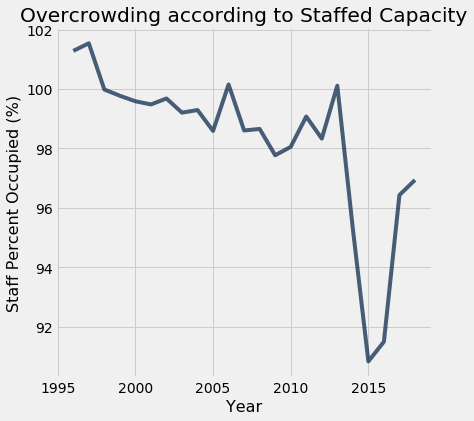

In [15]:
# Select only the necessary columns
total_pop_and_staff = prisons_updated.select("year", "total_population", "staffed_capacity")

# Group by year and sum all values for that year
pop_and_staff_sum = total_pop_and_staff.group("year", sum)

population_column = pop_and_staff_sum.column("total_population sum")
staff_capacity_column = pop_and_staff_sum.column("staffed_capacity sum")

staff_capacity_percentage = (population_column / staff_capacity_column)* 100

# Add a new column with our percentages
staff_and_total_percent_table = pop_and_staff_sum.with_column("Staff Percent", staff_capacity_percentage)
staff_and_total_percent_table.show(3)

staff_and_total_percent_table.plot("year", "Staff Percent")

plt.xlabel("Year") 
plt.ylabel("Staff Percent Occupied (%)")
plt.title("Overcrowding according to Staffed Capacity");

<font color = #d14d0f>**QUESTION 8**:</font> What trends do you notice within the line plot?

*Replace this text with your response!*

#### Designed Capacity Versus Staff Capacity

In the last two examples, we saw how crowded prisons have been over time by looking at their designed capacity and staffed capacity. However, it is still unclear what the relationship between the two percentages is. The solution? Make another plot! This time we will include both of the percentages we calculated.

To do this, we will create a new table with three columns, namely 
* Year
* Design Percentage
* Staff Percentage

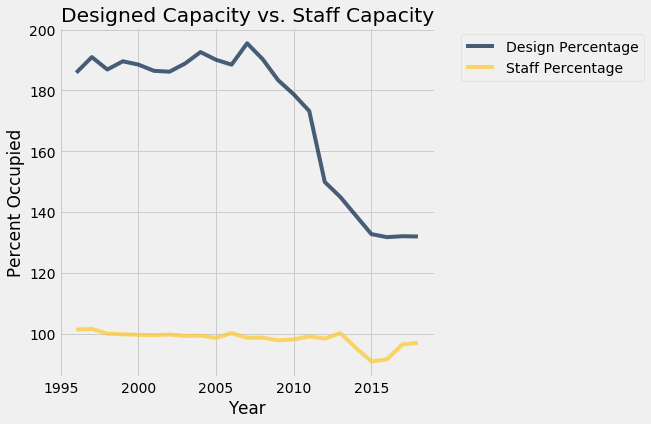

In [16]:
# Create a list/array of all the years we have data for
years = np.arange(1996, 2018 + 1) # We add 1 to include 2018

# Use our new years variable and capacity_percentage and staff_capacity_percentage
# from before as new columns in a new table called compare_table_design_and_staff
compare_table_design_and_staff = Table().with_columns(["year", years,
                                    "Design Percentage", capacity_percentage,
                                    "Staff Percentage", staff_capacity_percentage])

# Create a plot as before!
compare_table_design_and_staff.plot("year") # Notice that we only include one column

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Designed Capacity vs. Staff Capacity");

<font color = #d14d0f>**QUESTION 9:**</font> Consider the large gap between the two lines. Why is staff capacity much closer to 100% than designed capacity?

*Replace this text with your response!*

#### Interactive Widget

We have created an interactive widget for you in this section. In this example, you will be able to scroll through all of the prisons in California (numbered from 0 to 39, and you will see how the designed capacity versus population has changed over time.
<font color = #d14d0f>**Run the following cell to load the widget!**</font>

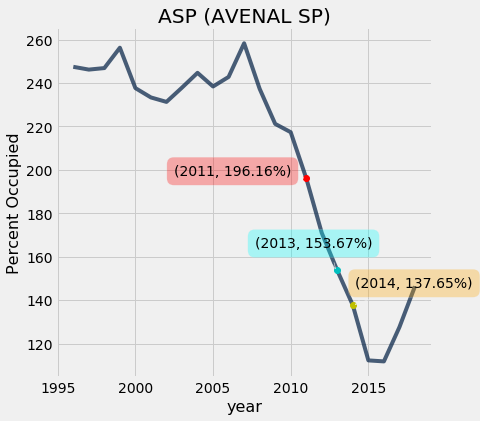

<Figure size 432x288 with 0 Axes>

In [17]:
%run -i scripts.py
widgets.VBox([widgets.VBox([inp]), out])

<font color = #d14d0f>**QUESTION 10**:</font> Select any institution from the widget and analyze how that institution's designed capacity changed over time using the three highlighted points. Predict how the design capacity would compare with the staff capacity of that specific institution.

*Replace this text with your response!*

----
### **Gender Division** <a id='subsection4'></a>

**Context:** The system in place reinforces the idea that the average inmate holds certain characteristics. Since we have limited data sets we cannot investigate many aspects of this claim. However, in order to get a better understanding of the population that the prison industrial complex was made to hold, we will investigate a few variables such as gender divisions, design capacity, and staff capacity. 

Let's begin by looking at all the **unique** institutions on our dataset. To do this, we will use the `group()` function once again. The counts of the table below represent the number of months for which we have data given an institution. The maximum counts that any of the institutions *should* have is 276.

In [18]:
prisons_updated.group("institution_name").show()

institution_name,count
ASP (AVENAL SP),276
CAL (CALIPATRIA SP),276
CCC (CA CORRECTIONAL CENTER),276
CCI (CA CORRECTIONAL INSTITUTION),276
CCWF (CENTRAL CA WOMEN'S FAC),276
CEN (CENTINELA SP),276
CHCF (CA HEALTH CARE FAC - STOCKTON),66
CIM (CA INSTITUTION FOR MEN),276
CIW (CA INSTITUTION FOR WOMEN),276
CMC (CA MEN'S COLONY),276


Since the data is made up of both male and female prisons, we will have to sort these prisons into separate groups before we can analyze them separately. However, we cannot ascertain whether a given institution is male or female-only given just the name. We had to double check whether an institution was male or female using sources outside of this notebook. 

One of the institutions that we found to be particularly interesting when looking at outside information was **VSP (VALLEY SP)**.

The California Department of Corrections and Rehabilitation began converting Valley State Prison into a facility for low-risk male inmates in October 2012, and it was completed by January 2013. Click [HERE](https://web.archive.org/web/20120111104018/http://cdcrtoday.blogspot.com/2011/12/cdcr-announces-plan-to-convert-female.html) or [HERE](https://www.cdcr.ca.gov/Facilities_Locator/VSP.html) to learn more. 

From these links you will learn that this conversion came as a result of realignment policies. We noted earlier that the monthly count for this institution was above 276, which could indicate monthly counts for male and female inmates, leading to a double count. Though we addressed this issue before we began working with the data at the beginning of the notebook, running these sanity checks is important in order to not obtain misleading results.

#### Unique Female Prisons

In this section, we will organize the data corresponding to female institutions. In the cell below, we look only at the prisons which we know are strictly female. The following code creates a list or array of all the institutions we know to be strictly female.

Note that our now separated "Valley SP" institution is included.

In [19]:
female_institutions = make_array("CCWF (CENTRAL CA WOMEN'S FAC)", 'CIW (CA INSTITUTION FOR WOMEN)',
       'CRC (CAL REHAB CTR, WOMEN)', 'FOL (FOLSOM SP) (FEMALE)',
       'FRCC (FRCCC BAKERSFIELD)', "NCWF (NO CAL WOMEN'S FACIL)", "VALLEY SP (FEMALE)")

**Filtering:** Now that we have a list of only the female serving institutions, we will create a new table in which only these select institutions are included, then group by institution to learn about the number of times a given institution appears in our data set. Again this should be *at most* 276.

In [20]:
# Keep only the institutions in our list
female_data = prisons_updated.where("institution_name", are.contained_in(female_institutions))
female_data.show(3)

female_prisons = female_data.group("institution_name")
female_prisons

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
2,1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
3,1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
4,1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842


institution_name,count
CCWF (CENTRAL CA WOMEN'S FAC),276
CIW (CA INSTITUTION FOR WOMEN),276
"CRC (CAL REHAB CTR, WOMEN)",138
FOL (FOLSOM SP) (FEMALE),72
FRCC (FRCCC BAKERSFIELD),17
NCWF (NO CAL WOMEN'S FACIL),85
VALLEY SP (FEMALE),204


#### Design Capacity Versus Staff Capacity for Female Institutions

Similar to the last sections, we will use the `select()` function to select necessary data in order to calculate the design versus staff capacities using our new `female_data` table.
We want to combine all the values within the same year across all institutions, so we will use the `group()` function and sum.

In [21]:
fem_year_pop_capacities = female_data.select("year", "total_population", "designed_capacity", "staffed_capacity")
fem_year_pop_capacities.show(3)

fem_year_groups = fem_year_pop_capacities.group("year", sum)
fem_year_groups.show(3)

year,total_population,designed_capacity,staffed_capacity
1996,790,400,760
1996,2859,2004,3224
1996,794,500,842


year,total_population sum,designed_capacity sum,staffed_capacity sum
1996,108007,72120,104654
1997,120200,70920,115384
1998,125888,70920,123282


Using the same techniques as in previous examples, we will calculate the designed capacity and staff capacity percentages.

In order to compare these two values with each other as we did before, we will want to add the percentages to a table. We could either create a new table, or add the percentages to our existing table and select only the necessary columns. Neither approach is more correct, but for readability's sake, we will create a new table below, and then plot the Designed and Staff percentages together.

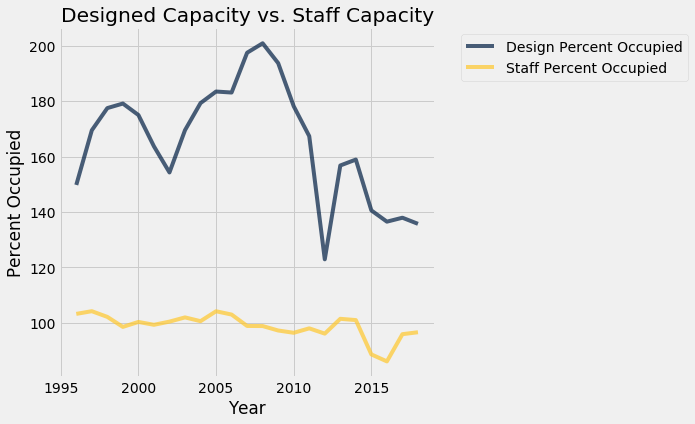

In [22]:
# Create a new variable with all the total population values
fem_total_population = fem_year_groups.column("total_population sum") 

# Calculate designed capacity percentages
fem_design_capacity = fem_year_groups.column("designed_capacity sum")
fem_design_percentage = (fem_total_population / fem_design_capacity) *100

# Calculate staff capacity percentages
fem_staff_capacity = fem_year_groups.column("staffed_capacity sum")
fem_staff_percentage =(fem_total_population / fem_staff_capacity)*100

fem_plot_table = Table().with_columns(
    "year", np.arange(1996, 2018+1),
    "Design Percent Occupied", fem_design_percentage,
    "Staff Percent Occupied", fem_staff_percentage)

fem_plot_table.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Designed Capacity vs. Staff Capacity");

#### Unique Male Prisons

Similar to our process in selecting only the female serving institutions, we will now repeat our analysis for male serving institutions. Another way to think about the filtering process is that we are excluding rows with female institutions.

Notice how instead of using a function called `are.contained_in()` we are using a function called `are.not_contained_in()`. In this way we skip the step where we make a list/array of only male serving prisons.

In [23]:
male_data = prisons_updated.where("institution_name", are.not_contained_in(female_institutions))
male_data.show(3)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
6,1996,1,WSP (WASCO SP),4475,62,4537,2484,182.6,4484
8,1996,1,SRTA (SANTA RITA CO. JAIL-RC),811,0,811,395,205.3,750
9,1996,1,RJD (RJ DONOVAN CORRECTIONAL FAC),4577,0,4577,2200,208,4566


#### Design Capacity Versus Staff Capacity for Male Institutions

We want to analyze the designed and staff capacities over time, so we will once again use the `select()` function to get relevant data and group by year. Let's repeat the same process as before, but with our male only data.

Just as in the female institution example, we will add both of the percentages to a new table, and plot them both.

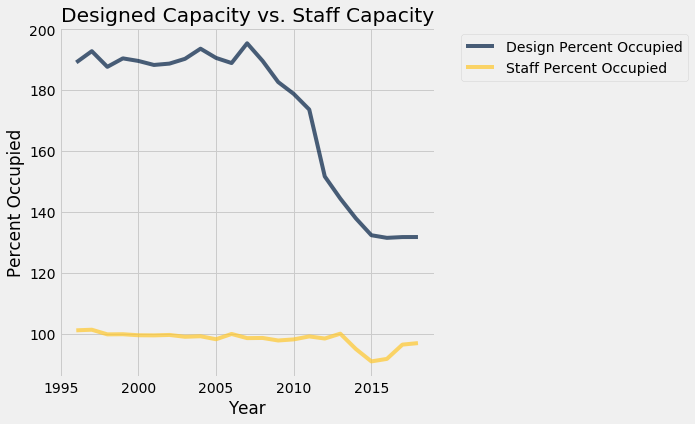

In [26]:
male_grouped_year = male_data.select("year", "total_population", "designed_capacity", "staffed_capacity").group('year', sum)

# Save total male population as new variable
male_total_population = male_grouped_year.column("total_population sum")

# Calculate design capacity percentage
male_design_capacity =  male_grouped_year.column("designed_capacity sum")
male_design_percentage = (male_total_population / male_design_capacity)* 100

# Calculate staff capacity percentage
male_staff_capacity =  male_grouped_year.column("staffed_capacity sum")
male_staff_percentage = (male_total_population / male_staff_capacity) *100

male_plot_table = Table().with_columns(
    "year", np.arange(1996, 2018+1),
    "Design Percent Occupied", male_design_percentage,
    "Staff Percent Occupied", male_staff_percentage)

male_plot_table.plot("year")
plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Designed Capacity vs. Staff Capacity");

#### Female vs Male Prisons: Designed and Staffed Capacities

Before we merge the two tables (`fem_plot_table` and `male_plot_table`), we will want to differentiate between the `Design Percent Occupied` column in the female table versus in the male table. Same with the staff percentage column. To do this, we will relabel the column names. The function that will relabel to the column names is called `relabel()`. The function takes in two inputs: the old column name and a new column name.

In [27]:
male_design_relabeled = male_plot_table.relabeled("Design Percent Occupied", "Male Designed Percentage")
male_relabeled = male_design_relabeled.relabeled("Staff Percent Occupied", "Male Staffed Percentage")

fem_design_relabeled = fem_plot_table.relabeled("Design Percent Occupied", "Female Designed Percentage")
fem_relabeled = fem_design_relabeled.relabeled("Staff Percent Occupied", "Female Staffed Percentage")

Now that we have distinct design and staff capacities for male and female groups, we can match the values by year. They contain information over the same years. To combine tables, we use a function called `join()`. The format for the function is:
- *data_table_one*`.join(` *same_column*, *data_table_two*`)` where same_column is the name of the column that appears in both tables.

In [28]:
male_and_female_table = male_relabeled.join("year", fem_relabeled)
male_and_female_table.show(3)

year,Male Designed Percentage,Male Staffed Percentage,Female Designed Percentage,Female Staffed Percentage
1996,189.107,101.147,149.76,103.204
1997,192.793,101.347,169.487,104.174
1998,187.651,99.8235,177.507,102.114


Now we can begin to do some comparative analysis on the two types of institutions. In the cells below we will generate some graphs to compare designed capacity between male and female prisons as well as staff capacity between the two.



### Male Prisons vs Female Prisons in both Staff and Designed Capacity

How does the combination of male and female institutions compare with the institutions overall (not separated between male and female)? To answer this question, let's look back towards the beginning of this notebook where we defined the table called `compare_table_design_and_staff` that compared designed and staff percentages by year that included both male and female institutions.

In [29]:
compare_table_design_and_staff.show(3)

year,Design Percentage,Staff Percentage
1996,185.859,101.281
1997,190.978,101.537
1998,186.899,99.9814


We want to combine the total percentages table above with the table that contains the percentages for male and female prisons separately. To combine the two tables, we will use the `join()` function again.

In [30]:
all_joined = compare_table_design_and_staff.join("year", male_and_female_table)
all_joined.show(3)

year,Design Percentage,Staff Percentage,Male Designed Percentage,Male Staffed Percentage,Female Designed Percentage,Female Staffed Percentage
1996,185.859,101.281,189.107,101.147,149.76,103.204
1997,190.978,101.537,192.793,101.347,169.487,104.174
1998,186.899,99.9814,187.651,99.8235,177.507,102.114


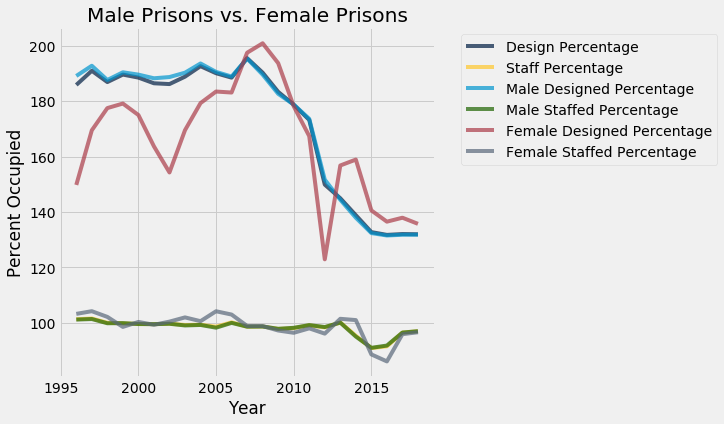

In [31]:
all_joined.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male Prisons vs. Female Prisons");

<font color = #d14d0f>**QUESTION 11:**</font> 
Comment on the plot above. What are the differences between designed and staffed capacity? What are some patterns unique to female institutions? Why does the total population look almost identical to the male prisons percentages?

*Replace this text with your response!*

----

## Jails <a id='jailssection'></a>

### <font color =#d14d0f>Context</font>  <a id='sectionjcontext'></a>
---

Throughout the course, we have learned about the policies of realignment, incarceration, and crime trends in California. By exploring these data sets we hope to obtain a clearer picture of the magnitude of prison and county jail overcrowding per facility and region, and the effects of realignment policies on state prisons and county jails.

To review, the key difference between state prisons and jails involve the process of sentencing. Prisons are designed for long term sentences, while jails are for those who are unsentenced or have short term sentences. It is important to note that short-term sentences are generally one year or less. Another difference is that prisons are larger and controlled at the state level. In contrast, jails are smaller and handled by a city or county.

The relationship between the two institutions is emphasized by mass incarceration. Through this activity, we will analyze how overcrowding within California’s state prisons influenced the size of jail populations after realignment policies were implemented.

### The Data<a id='sectionjdata'></a>
---

We will work with data from the Jail Profile Survey provided by the Board of State and Community Corrections (BSCC). 


The Jail Profile Survey releases reports on data recorded by local agencies. Some of the information we will find here include the total number of unsentenced and sentenced males and females in each of these facilities. This data has been used to determine the needs of each of these counties when determining the distribution of state bond monies and future projections for other jail needs.

If you are interested in learning more please visit:

[Jail Profile Survey](http://www.bscc.ca.gov/downloads/JPSWorkbook.pdf) 

[Jail Profile Survey data](https://app.bscc.ca.gov/joq//jps/QuerySelection.asp)

#### Data Dictionary
Below is a data dictionary for future reference. This data dictionary goes over what the column names represent in the data we will load below.

|Column Name   | Description |
|--------------|---------|
|Jurisdiction | The unit of government that has legal authority over an inmate (state or federal)|
|Facility | Name of the county jail |
|Year |Year that the data was collected |
|Month | Month that the data was collected |
|Unsentenced males| Non-sentenced inmates are all inmates other than those who have been sentenced on all charges pending * ** |
|Unsentenced females| Non-sentenced inmates are all inmates other than those who have been sentenced on all charges pending * **|
|Sentenced males| Sentenced inmates are those who have been sentenced on all charges and are no longer on trial. This category includes inmates who are being incarcerated pending or during an appeal. * |
|Sentenced females|Sentenced inmates are those who have been sentenced on all charges and are no longer on trial. This category includes inmates who are being incarcerated pending or during an appeal. * |
|Total facility ADP| ADP Total should include all inmates (including those under contract from any agency/jurisdiction) assigned to all single/double and multiple occupancy cells, administrative segregation, disciplinary isolation, and medical and mental health beds.|


**Please note the following:**

\* The counts for sentenced and unsentences male/female inmates is an *average daily population (ADP)* for the given month.


** For example, if an inmate has been sentenced on three charges but is still being tried on a fourth charge, they should be reported as “non-sentenced.”

** If an inmate is found not to be competent for trial and is detained in a county jail facility, count them in Non-Sentenced (Male/Female & Misdemeanor/Felony). If they are detained in the state hospital, do not count them in any category.

#### Importing the Data

Let's start off by importing our `jail` data. As a refresher, we do this by creating an instance of a table (`Table()`) and populating it with our data which we read in from a location within our folders. It takes in a file and reads and outputs it as a table for our use here!

In [ ]:
jail = Table().read_table("data/jails_cleaned.csv")
jail.show(5)

### **Data Analysis**
Just as we did with the Prisons dataset, the first thing we want to do is check that the number of months does not exceed 276. We'll group by `Facility` using the `group()` table function and then sort by `count` using the `sort()` table function and set descending to True.

In [33]:
jail_grouped = jail.group("Facility")
jail_grouped.sort('count', descending = True)

Facility,count
Amador County Jail,276
Blythe Jail,276
Bob Wiley Detention Facility,276
Butte County Jail,276
Claybank Facility,276
Colusa County Jail,276
Del Norte County Jail,276
East Mesa Reentry Facility,276
Elmwood Complex - Men's facility,276
Elmwood Complex - Women's Facility,276


Do you see any count abnormalities? In contrast to our Prisons notebook, there do not seem to be any issues with the counts!

In the table above, we produced a table with a row entry for each month in a given year for 23 years for each jail. Like we did in our previous notebook, we want to get the **yearly total for each institution** to explore how this total number of inmates in the jail population changed over time. To accomplish this, the first thing we need to do is aggregate or group some columns.

Our first step is to select the appropriate columns. We select the columns `Year`, `Unsentenced males`, `Unsentenced females`, `Sentenced males`, `Sentenced females`, and `Total facility ADP` using the `select()` function.

Next we want to store this as a new variable for future use. We assign this new table to a variable called `data_year`, then obtain the yearly totals for each institution.

In [34]:
data_year = jail.select('Year','Unsentenced males', 'Unsentenced females','Sentenced males','Sentenced females', 'Total facility ADP')
data_year = data_year.group("Year", sum)
data_year.show(5)

Year,Unsentenced males sum,Unsentenced females sum,Sentenced males sum,Sentenced females sum,Total facility ADP sum
1995,111311,13430.4,73436.1,11201.6,209225
1996,444830,55555.7,300297,44444.9,845128
1997,461675,64381.5,326194,52028.7,904279
1998,469013,66372.2,337045,58904.8,931335
1999,463570,63054.8,316691,54883.7,898199


Our first investigation will be into the total facility ADP over the years. For the remainder of the notebook, we will focus on years that mark significant shifts in population among jails. We will focus mainly on 2011 and 2014 by plotting red dots to mark those years in cells below.

First, let's obtain the data where the year equals 2011 and 2014. To do this we will use the `where()` table function to limit our data to the year 2011 and assign it to a new variable `data2011`, and similarly for 2014.

In [36]:
data2011 = data_year.where("Year", 2011)

data2014 = data_year.where('Year', 2014)

Note that we are only interested in the last column, `Total facility ADP sum`, and the year. We can select that from the previous cell and assign it to `y_coordinate_2011` and `y_coordinate_2014`. Now that we have our desired two points, we can plot the `Total facility ADP sum` vs. `year` and overlay the data points from 2011 and 2014. Run the cell below to generate the plot.

In [ ]:
x_coordinate_2011 = data2011.column('Year')
y_coordinate_2011 = data2011.column('Total facility ADP sum')

x_coordinate_2014 = data2014.column("Year")
y_coordinate_2014 = data2014.column("Total facility ADP sum")

data_year.plot("Year", "Total facility ADP sum")
plt.xlabel("Year")
plt.ylabel("Total Facility ADP")
plt.title("Total Facility ADP over time")

plt.plot(x_coordinate_2011, y_coordinate_2011, 'ro')
plt.plot(x_coordinate_2014, y_coordinate_2014, 'ro');

<div class="alert alert-warning">Flagged Question -- court case? </div>

**Question 5)** In looking at the graph you produced, how does it reflect the systematic changes of California's potential jail population? Name a court case that is represented by a red dot in your plot.

*Replace this text with your response!*

### **General: Designed and Staffed Capacity**
In this section we revisit designed and staffed capacities. We will go ahead and compare the sentenced and unsentences populations for county jails. We will specifically be creating and looking at the following comparisons:
* Overall (male and female) sentenced and (male and female) unsentenced
* Male unsentenced vs male sentenced
* Female unsentenced vs female sentenced

#### General: Sentenced vs Unsentenced

To understand how sentenced vs unsentenced jail populations have changed over time, we will need to estimate the totals for each of these two categories. In looking at our data set we can notice that is is composed of 4 main columns, however none displays the total for these categories. 

|Sentenced males|Sentenced females|Unsentenced males| Unsentenced females|Total facility ADP|
|--------------|---------|------|----------|-----|

Therefore, we begin by calculating the sentenced total and the unsentenced total. We will need to combine male and female data for each of these two categories.

Let's begin by separating each column into a new variable so that we can easily extract and later combine the values that we need. As a refresher, you can use the table function `column()` to select the values in a given column.

First, we select all the values for male sentenced and female sentenced and save it into new variables `m_sentenced` and `f_sentenced` respectively, and the same for  **unsentenced** males and females to `m_unsentenced` and `f_unsentenced`.

In [ ]:
m_sentenced = data_year.column("Sentenced males sum")
f_sentenced = data_year.column("Sentenced females sum")

m_unsentenced = data_year.column("Unsentenced males sum")
f_unsentenced = data_year.column("Unsentenced females sum")

We can add the values from `m_sentenced` and `f_sentenced` into a single column to get the total sentenced per year, and the same for `m_unsentenced` and `f_unsentenced`.

In [41]:
sentenced_all =  m_sentenced + f_sentenced

unsentenced_all = m_unsentenced + f_unsentenced 

We can now go ahead and add these two values to our original data table (called `data_year`). We will use the table function `with_column()` which takes in a label for your column, and the values that you want to assign to that new column.

In [42]:
data_year = data_year.with_column("Total Sentenced", sentenced_all)
data_year = data_year.with_column("Total Unsentenced", unsentenced_all)

data_year.show(5)

Year,Unsentenced males sum,Unsentenced females sum,Sentenced males sum,Sentenced females sum,Total facility ADP sum,Total Sentenced,Total Unsentenced
1995,111311,13430.4,73436.1,11201.6,209225,84637.7,124742
1996,444830,55555.7,300297,44444.9,845128,344742,500385
1997,461675,64381.5,326194,52028.7,904279,378223,526056
1998,469013,66372.2,337045,58904.8,931335,395950,535386
1999,463570,63054.8,316691,54883.7,898199,371575,526624


---
Now we can explore the data as **percentages**. (Why we might want to work with percentages instead of counts?) Our end goal here will be to plot percent ADP over time.

To do this, we can get our total using the column `Total facility ADP sum` and then divide the total sentenced and total unsentenced by this value. 

In [43]:
total_adp = data_year.column("Total facility ADP sum")

sent_percent = sentenced_all / total_adp * 100
unsent_percent = unsentenced_all / total_adp * 100

Now that we have our percentages, let's repeat the same process as before to add these new percentage values to our `data_year` table and select the relevant columns that we want in order to plot percent ADP over time.

In [44]:
data_year = data_year.with_column("Total Sentenced Percent", sent_percent)
data_year = data_year.with_column("Total Unsentenced Percent", unsent_percent)

percent_totals = data_year.select("Year", "Total Sentenced Percent", "Total Unsentenced Percent")
percent_totals

Year,Total Sentenced Percent,Total Unsentenced Percent
1995,40.4529,59.6207
1996,40.7917,59.2083
1997,41.8259,58.1741
1998,42.5142,57.4858
1999,41.3689,58.6311
2000,39.6463,60.3537
2001,38.3581,61.642
2002,37.3311,62.669
2003,34.7304,65.2696
2004,34.0513,65.9487


We'll plot dots so we can highlight specific years in the jails, namely, 2011 and 2014. Let's see how these specific years play out on our plot above by plotting red dots representing those years.

First, let's start off by getting the data in the years 2011 and 2014.

In [46]:
data2011 = percent_totals.where("Year", 2011)
data2014 = percent_totals.where("Year", 2014)

Next, we want to get the x and y coordinates of each point using the data we just found. For example, using `data2011`, we can now assign `x_coordinate2011` to the `year` column and the `y_coordinate2011` to the `Percent` column. This process is similar to the plot of the Total Facility ADP over time from earlier. We repeat similar steps to generate the plot below.

In [ ]:
x_coordinate2011 = data2011.column('Year')
y_coordinate2011 = data2011.column("Total Sentenced Percent")
y_coordinate2011_un = data2011.column("Total Unsentenced Percent")

x_coordinate2014 = data2014.column("Year")
y_coordinate2014 = data2014.column("Total Sentenced Percent")
y_coordinate2014_un = data2014.column("Total Unsentenced Percent")

percent_totals.plot("Year")
plt.title("Total Sentenced Percent vs Total Unsentenced Percent")
plt.xlabel("Year")
plt.ylabel("Percent of People")

plt.plot(x_coordinate2011, y_coordinate2011, 'ro')
plt.plot(x_coordinate2014, y_coordinate2014, 'ro')
plt.plot(x_coordinate2011, y_coordinate2011_un, 'ro')
plt.plot(x_coordinate2014, y_coordinate2014_un, 'ro');

<font color = #d14d0f>**Question 9)**</font> Is there anything interesting that you see related to the percentages and years? How does looking at percentages and numbers compare?

*Replace this text with your response!*

### **Gender Division**

#### Sentenced vs Unsentenced

We just looked at the total number of people who were sentenced and the total number of people who were unsentenced by year. Next, let's look at just the number of **males who were sentenced vs the number of males who were unsentenced**. Let's start by selecting the relevant columns that we are going to use for our analysis.

We have found and plotted the counts of males but let's try finding the **percentage** of males from the total ADP count. Start by getting the sum of the sentenced males column, the sum of the unsentenced males column, and then dividing both of these columns by the total ADP.

Let's add these new percentage columns to our male table and then select the appropriate columns for plotting.

In [50]:
males = data_year.select("Year", "Sentenced males sum", "Unsentenced males sum")

male_sent = males.column("Sentenced males sum")
male_unsent = males.column("Unsentenced males sum")

m_sent_percent = male_sent / total_adp * 100
m_unsent_percent = male_unsent / total_adp * 100

males = males.with_column("Total Male Sentenced Percent", m_sent_percent)
males = males.with_column("Total Male Unsentenced Percent", m_unsent_percent)
m_percent_totals = males.select("Year", "Total Male Sentenced Percent", "Total Male Unsentenced Percent")

m_percent_totals

Year,Total Male Sentenced Percent,Total Male Unsentenced Percent
1995,35.099,53.2016
1996,35.5328,52.6346
1997,36.0723,51.0544
1998,36.1894,50.3593
1999,35.2584,51.611
2000,33.9134,52.9598
2001,32.9984,54.4064
2002,32.2428,55.249
2003,29.9154,57.3349
2004,29.2501,57.828


Now we'll plot the **percentage** of males who were sentenced vs the percentage of males who were unsentenced.

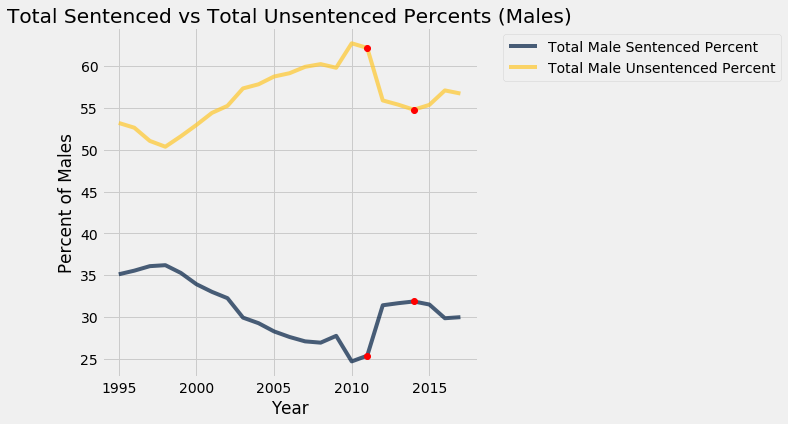

In [51]:
# Filtering data for just 2011 and 2014
data2011 = m_percent_totals.where("Year", 2011)
data2014 = m_percent_totals.where("Year", 2014)

# Create x and y coordinates for 2011
x_coordinate2011 = data2011.column('Year')
y_coordinate2011 = data2011.column("Total Male Sentenced Percent")
y_coordinate2011_un = data2011.column("Total Male Unsentenced Percent")

# Create x and y coordinates for 2014
x_coordinate2014 = data2014.column('Year')
y_coordinate2014 = data2014.column("Total Male Sentenced Percent")
y_coordinate2014_un = data2014.column("Total Male Unsentenced Percent")

# Base plot creation
m_percent_totals.plot("Year")

plt.title("Total Sentenced vs Total Unsentenced Percents (Males)")
plt.xlabel("Year")
plt.ylabel("Percent of Males")


# Adding our points
plt.plot(x_coordinate2011, y_coordinate2011, 'ro')
plt.plot(x_coordinate2014, y_coordinate2014, 'ro')
plt.plot(x_coordinate2011, y_coordinate2011_un, 'ro')
plt.plot(x_coordinate2014, y_coordinate2014_un, 'ro');

#### Females: Sentenced vs. Unsentenced

Above we analyzed just the males that were sentenced and unsentenced. Now we will do the same with females. Because the process is exactly similar to what we've done before we will simply have you run the code cells to generate the plots and focus on analysis instead. We will calculate the percentages of sentenced females and unsentenced females and plot this relationship.

In [52]:
# First, we create a table with only female information:
females = data_year.select('Year', 'Sentenced females sum', 'Unsentenced females sum')

# First, store necessary data in new variables for future use
female_sent = females.column('Sentenced females sum')
female_unsent = females.column('Unsentenced females sum')

# Then calculate percentages:
f_sent_percent = (female_sent / total_adp) * 100
f_unsent_percent = (female_unsent / total_adp) * 100

# Finally, add the new variables to our table and select relevant columns for plotting:
females = females.with_columns(
    "Total Female Sentenced Percent", f_sent_percent,
    "Total Female Unsentenced Percent", f_unsent_percent)

f_percent_totals = females.select('Year', 'Total Female Sentenced Percent', 'Total Female Unsentenced Percent')
f_percent_totals

Year,Total Female Sentenced Percent,Total Female Unsentenced Percent
1995,5.35384,6.4191
1996,5.25896,6.57364
1997,5.75361,7.11964
1998,6.32477,7.12656
1999,6.11041,7.02014
2000,5.73295,7.39388
2001,5.35973,7.23554
2002,5.08828,7.41998
2003,4.81506,7.93463
2004,4.80112,8.12072


Using these three columns, we can plot the percentages for females as well as add the red dots on the years 2011 and 2014.

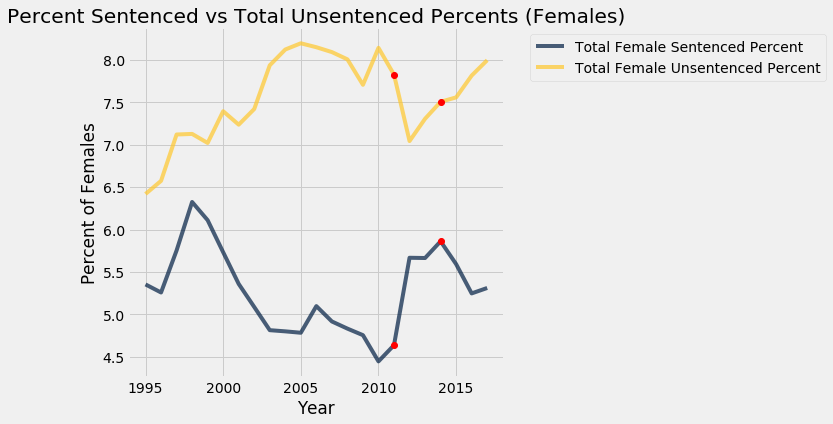

In [53]:
# Select years of interest
data2011 = f_percent_totals.where("Year", 2011)
data2014 = f_percent_totals.where("Year", 2014)

# Get the coordinates for the Year 2011 for the Total Female Sentenced Percent 
x_coordinate2011 = data2011.column('Year')
y_coordinate2011 = data2011.column("Total Female Sentenced Percent")

# Get the coordinates for the Year 2014 for the Total Female Sentenced Percent 
y_coordinate2014 = data2014.column("Total Female Sentenced Percent")

# Get the coordinates for the Year 2011 for the Total Female Unsentenced Percent 
x_coordinate2011_un = data2011.column('Year')
y_coordinate2011_un = data2011.column("Total Female Unsentenced Percent")

# Get the coordinates for the Year 2014 for the Total Female Unsentenced Percent 
y_coordinate2014_un = data2014.column("Total Female Unsentenced Percent")

# Plot 
f_percent_totals.plot("Year")
plt.title("Percent Sentenced vs Total Unsentenced Percents (Females)")
plt.xlabel("Year")
plt.ylabel("Percent of Females")

# Add red dots
plt.plot(x_coordinate2011, y_coordinate2011, 'ro')
plt.plot(x_coordinate2014, y_coordinate2014, 'ro')
plt.plot(x_coordinate2011, y_coordinate2011_un, 'ro')
plt.plot(x_coordinate2014, y_coordinate2014_un, 'ro');

<font color = #d14d0f>**Question 12)**</font> Compare the totals plot (completed before) to the one you just created. What kind of story does this plot reveal?


*Replace this text with your response!*

<font color = #d14d0f>**Question 13)**</font> Given the last graph from the previous notebook, compare your final results to the ones presented here. What story do these two data sets (Prisons and Jails) tell you when you look at them side by side? How do they show the impact of realignment? The graph is shown below.

<img src='./data/lecture1_finalgraph.png'>

*Replace this text with your response!*

---
Notebook developed by: Ashley Quiterio, Shalini Kunapuli, Alma Pineda, and William McEachen

Data Science Modules: http://data.berkeley.edu/education/modules

